## Reading Data from the STAC API

The Planetary Computer catalogs the datasets we host using the [STAC](http://stacspec.org/) (SpatioTemporal Asset Catalog) specification. We provide a [STAC API](https://github.com/radiantearth/stac-api-spec) endpoint for searching our datasets by space, time, and more. This quickstart will show you how to search for data using our STAC API and open-source Python libraries.

To access the data, we'll create a `pystac_client.Client`. We'll explain the `modifier` part later on, but it's what lets us download the data assets Azure Blob Storage.

In [5]:
%pip install rich leafmap planetary_computer

  Using cached leafmap-0.31.9-py2.py3-none-any.whl.metadata (17 kB)
  Using cached bqplot-0.12.43-py2.py3-none-any.whl.metadata (6.4 kB)
  Using cached colour-0.1.5-py2.py3-none-any.whl.metadata (18 kB)
  Using cached duckdb-0.10.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (763 bytes)
  Using cached gdown-5.1.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached geojson-3.1.0-py3-none-any.whl.metadata (16 kB)
  Using cached ipyevents-2.0.2-py3-none-any.whl.metadata (2.9 kB)
  Using cached ipyfilechooser-0.6.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached python_box-7.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.8 kB)
  Using cached scooby-0.9.2-py3-none-any.whl.metadata (15 kB)
  Using cached whiteboxgui-2.3.0-py2.py3-none-any.whl.metadata (5.7 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
  Using cached whitebox-2.3.1-py2.py3-none-any.whl.met

In [25]:
import pystac_client
import planetary_computer
import leafmap
from pystac.extensions.eo import EOExtension as eo


catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

### Searching

We can use the STAC API to search for assets meeting some criteria. This might include the date and time the asset covers, is spatial extent, or any other property captured in the STAC item's metadata.

In [7]:
m = leafmap.Map(center=[-6.054643555224412, -50.18255000697929], zoom=12, height="600px")
m.add_basemap("satellite")
m

Map(center=[-6.054643555224412, -50.18255000697929], controls=(ZoomControl(options=['position', 'zoom_in_text'…

In [20]:
time_of_interest = "2020-06-01/2020-12-31"

In [41]:
area_of_interest = {
  "type": "Polygon",
  "coordinates": [
    [[-50.3658, -6.1518], 
     [-50.0311, -6.1518], 
     [-50.0311, -5.9716], 
     [-50.3658, -5.9716], 
     [-50.3658, -6.1518]]
  ]
}

In [42]:
search = catalog.search(
    collections=["sentinel-2-l2a"],
    intersects=area_of_interest,
    datetime=time_of_interest,
    query={"eo:cloud_cover": {"lt": 10}},
)

items = search.item_collection()
len(items)

28

Each [`pystac.Item`](https://pystac.readthedocs.io/en/stable/api/pystac.html#pystac.Item) in this `ItemCollection` includes all the metadata for that scene. [STAC Items](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md) are GeoJSON features, and so can be loaded by libraries like [geopandas](http://geopandas.readthedocs.io/).

In [43]:
import geopandas

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df

,geometry,datetime,platform,proj:epsg,instruments,s2:mgrs_tile,constellation,s2:granule_id,eo:cloud_cover,s2:datatake_id,...,s2:cloud_shadow_percentage,s2:nodata_pixel_percentage,s2:unclassified_percentage,s2:dark_features_percentage,s2:not_vegetated_percentage,s2:degraded_msi_data_percentage,s2:high_proba_clouds_percentage,s2:reflectance_conversion_factor,s2:medium_proba_clouds_percentage,s2:saturated_defective_pixel_percentage
0,"POLYGON ((-50.09735 -5.42755, -49.10651 -5.425...",2020-09-17T13:42:09.024000Z,Sentinel-2B,32722,[msi],22MFU,Sentinel 2,S2B_OPER_MSI_L2A_TL_ESRI_20200921T060305_A0184...,0.920518,GS2B_20200917T134209_018454_N02.12,...,0.150776,0.000000,1.090063,0.380078,42.393625,0.0,0.480453,0.988806,0.436508,0.0
1,"POLYGON ((-50.84714 -6.42137, -50.84518 -6.412...",2020-09-17T13:42:09.024000Z,Sentinel-2B,32722,[msi],22MEU,Sentinel 2,S2B_OPER_MSI_L2A_TL_ESRI_20200921T060243_A0184...,4.986651,GS2B_20200917T134209_018454_N02.12,...,0.583401,26.670364,2.926427,0.558090,11.434204,0.0,3.279116,0.988806,1.702436,0.0
2,"POLYGON ((-50.09735 -5.42755, -49.10651 -5.425...",2020-09-07T13:42:19.024000Z,Sentinel-2B,32722,[msi],22MFU,Sentinel 2,S2B_OPER_MSI_L2A_TL_ESRI_20200911T175647_A0183...,2.074535,GS2B_20200907T134219_018311_N02.12,...,0.843269,0.000000,1.443983,0.657456,34.896806,0.0,1.234750,0.983689,0.768312,0.0
3,"POLYGON ((-50.09735 -5.42755, -49.10651 -5.425...",2020-09-02T13:42:21.024000Z,Sentinel-2A,32722,[msi],22MFU,Sentinel 2,S2A_OPER_MSI_L2A_TL_ESRI_20201027T062313_A0271...,2.923614,GS2A_20200902T134221_027148_N02.12,...,1.426399,0.000007,1.425838,0.960100,30.281341,0.0,1.926155,0.981314,0.991261,0.0
4,"POLYGON ((-50.85269 -6.42137, -50.84952 -6.407...",2020-09-02T13:42:21.024000Z,Sentinel-2A,32722,[msi],22MEU,Sentinel 2,S2A_OPER_MSI_L2A_TL_ESRI_20201027T062310_A0271...,4.562206,GS2A_20200902T134221_027148_N02.12,...,0.933563,26.126805,1.904398,0.599552,10.123049,0.0,2.826738,0.981314,1.732091,0.0
5,"POLYGON ((-50.09735 -5.42755, -49.10651 -5.425...",2020-08-23T13:42:21.024000Z,Sentinel-2A,32722,[msi],22MFU,Sentinel 2,S2A_OPER_MSI_L2A_TL_ESRI_20200825T162152_A0270...,3.129734,GS2A_20200823T134221_027005_N02.12,...,1.146675,0.000007,0.977897,0.590542,35.292387,0.0,2.509255,0.977012,0.604325,0.0
6,"POLYGON ((-50.85245 -6.42137, -50.85156 -6.417...",2020-08-23T13:42:21.024000Z,Sentinel-2A,32722,[msi],22MEU,Sentinel 2,S2A_OPER_MSI_L2A_TL_ESRI_20200825T162146_A0270...,7.767181,GS2A_20200823T134221_027005_N02.12,...,1.916682,26.158804,1.618472,0.402259,11.936402,0.0,6.601166,0.977012,1.067991,0.0
7,"POLYGON ((-50.09735 -5.42755, -49.10651 -5.425...",2020-08-08T13:42:19.024000Z,Sentinel-2B,32722,[msi],22MFU,Sentinel 2,S2B_OPER_MSI_L2A_TL_ESRI_20200815T124607_A0178...,0.018314,GS2B_20200808T134219_017882_N02.12,...,0.000372,0.000013,0.142587,0.179329,25.236642,0.0,0.002137,0.971885,0.014725,0.0
8,"POLYGON ((-50.84341 -6.42136, -50.81216 -6.281...",2020-08-08T13:42:19.024000Z,Sentinel-2B,32722,[msi],22MEU,Sentinel 2,S2B_OPER_MSI_L2A_TL_ESRI_20200815T124549_A0178...,0.015494,GS2B_20200808T134219_017882_N02.12,...,0.000005,27.022946,0.095384,0.197674,9.940471,0.0,0.000350,0.971885,0.012230,0.0
9,"POLYGON ((-50.09735 -5.42755, -49.10651 -5.425...",2020-07-29T13:42:19.024000Z,Sentinel-2B,32722,[msi],22MFU,Sentinel 2,S2B_OPER_MSI_L2A_TL_ESRI_20200818T015554_A0177...,0.016453,GS2B_20200729T134219_017739_N02.12,...,0.001642,0.000000,0.150680,0.215537,15.834779,0.0,0.002551,0.969481,0.012936,0.0


Some collections implement the `eo` extension, which we can use to sort the items by cloudiness. We'll grab an item with low cloudiness:

In [44]:
least_cloudy_item = min(items, key=lambda item: eo.ext(item).cloud_cover)

print(
    f"Choosing {least_cloudy_item.id} from {least_cloudy_item.datetime.date()}"
    f" with {eo.ext(least_cloudy_item).cloud_cover}% cloud cover"
)

Choosing S2A_MSIL2A_20200614T134221_R124_T22MEU_20200827T082613 from 2020-06-14 with 0.008988% cloud cover


Each STAC item has one or more [Assets](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md#asset-object), which include links to the actual files.

In [45]:
import rich.table

table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in least_cloudy_item.assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key          ┃ Description                           ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ AOT                │ Aerosol optical thickness (AOT)       │
│ B01                │ Band 1 - Coastal aerosol - 60m        │
│ B02                │ Band 2 - Blue - 10m                   │
│ B03                │ Band 3 - Green - 10m                  │
│ B04                │ Band 4 - Red - 10m                    │
│ B05                │ Band 5 - Vegetation red edge 1 - 20m  │
│ B06                │ Band 6 - Vegetation red edge 2 - 20m  │
│ B07                │ Band 7 - Vegetation red edge 3 - 20m  │
│ B08                │ Band 8 - NIR - 10m                    │
│ B09                │ Band 9 - Water vapor - 60m            │
│ B11                │ Band 11 - SWIR (1.6) - 20m            │
│ B12                │ Band 12 - SWIR (2.2) - 20m            │
│ B8A                │ Band 8A - Vegetation red edge 4 - 20m │
│ SCL                │ Scene classfication map (SCL)         │
│ WVP                │ Water vapour (WVP)                    │
│ visual             │ True color image                      │
│ preview            │ Thumbnail                             │
│ safe-manifest      │ SAFE manifest                         │
│ granule-metadata   │ Granule metadata                      │
│ inspire-metadata   │ INSPIRE metadata                      │
│ product-metadata   │ Product metadata                      │
│ datastrip-metadata │ Datastrip metadata                    │
│ tilejson           │ TileJSON with default rendering       │
│ rendered_preview   │ Rendered preview                      │
└────────────────────┴───────────────────────────────────────┘

Here, we'll inspect the `rendered_preview` asset.

In [88]:
least_cloudy_item.assets["rendered_preview"].to_dict()

{'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=sentinel-2-l2a&item=S2A_MSIL2A_20200614T134221_R124_T22MEU_20200827T082613&assets=visual&asset_bidx=visual%7C1%2C2%2C3&nodata=0&format=png',
 'type': 'image/png',
 'title': 'Rendered preview',
 'rel': 'preview',
 'roles': ['overview']}

We can now use the HREF to read our data in any tools that can retrieve data from URLs via HTTP GET operations.

In [87]:
# Rendering With Image 
from IPython.display import Image, display

Image(url=least_cloudy_item.assets["rendered_preview"].href, width=500)

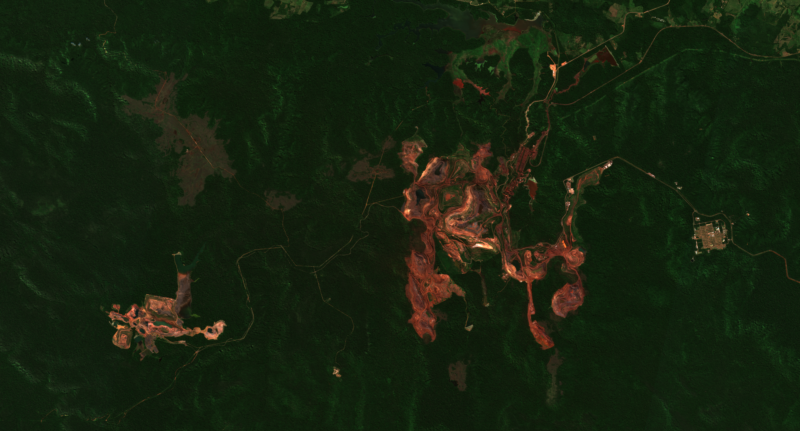

In [89]:
# Rendering with rasterio

import rasterio
from rasterio import windows
from rasterio import features
from rasterio import warp

import numpy as np
from PIL import Image

with rasterio.open(asset_href) as ds:
    aoi_bounds = features.bounds(area_of_interest)
    warped_aoi_bounds = warp.transform_bounds("epsg:4326", ds.crs, *aoi_bounds)
    aoi_window = windows.from_bounds(transform=ds.transform, *warped_aoi_bounds)
    band_data = ds.read(window=aoi_window)

img = Image.fromarray(np.transpose(band_data, axes=[1, 2, 0]))
w = img.size[0]
h = img.size[1]
aspect = w / h
target_w = 800
target_h = (int)(target_w / aspect)
img.resize((target_w, target_h), Image.Resampling.BILINEAR)

That `rendered_preview` asset is generated dynamically from the raw data using the Planetary Computer's [data API](http://planetarycomputer.microsoft.com/api/data/v1/). We can access the raw data, stored as Cloud Optimzied GeoTIFFs in Azure Blob Storage, using one of the other assets.

The actual data assets are in *private* [Azure Blob Storage containers](https://docs.microsoft.com/en-us/azure/storage/blobs/storage-blobs-introduction#containers). If forget to pass `modifier=planetary_computer.sign_inplace` or manually sign the item, then you'll get a 404 when trying to access the asset.

That's why we included the `modifier=planetary_computer.sign_inplace` when we created the `pystac_client.Client` earlier. With that, the results returned by pystac-client are automatically signed, so that a token granting access to the file is included in the URL.

## Access individual Channels

In [53]:
# Defined above
table

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key          ┃ Description                           ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ AOT                │ Aerosol optical thickness (AOT)       │
│ B01                │ Band 1 - Coastal aerosol - 60m        │
│ B02                │ Band 2 - Blue - 10m                   │
│ B03                │ Band 3 - Green - 10m                  │
│ B04                │ Band 4 - Red - 10m                    │
│ B05                │ Band 5 - Vegetation red edge 1 - 20m  │
│ B06                │ Band 6 - Vegetation red edge 2 - 20m  │
│ B07                │ Band 7 - Vegetation red edge 3 - 20m  │
│ B08                │ Band 8 - NIR - 10m                    │
│ B09                │ Band 9 - Water vapor - 60m            │
│ B11                │ Band 11 - SWIR (1.6) - 20m            │
│ B12                │ Band 12 - SWIR (2.2) - 20m            │
│ B8A                │ Band 8A - Vegetation red edge 4 - 20m │
│ SCL                │ Scene classfication map (SCL)         │
│ WVP                │ Water vapour (WVP)                    │
│ visual             │ True color image                      │
│ preview            │ Thumbnail                             │
│ safe-manifest      │ SAFE manifest                         │
│ granule-metadata   │ Granule metadata                      │
│ inspire-metadata   │ INSPIRE metadata                      │
│ product-metadata   │ Product metadata                      │
│ datastrip-metadata │ Datastrip metadata                    │
│ tilejson           │ TileJSON with default rendering       │
│ rendered_preview   │ Rendered preview                      │
└────────────────────┴───────────────────────────────────────┘

In [90]:
import requests

requests.head(least_cloudy_item.assets["B02"].href).status_code

200

The `200` status code indicates that we were able to successfully access the data using the "signed" URL with the SAS token included.

We can load up that single COG using libraries like [rioxarray](https://corteva.github.io/rioxarray/html/rioxarray.html) or [rasterio](https://rasterio.readthedocs.io/en/latest/)

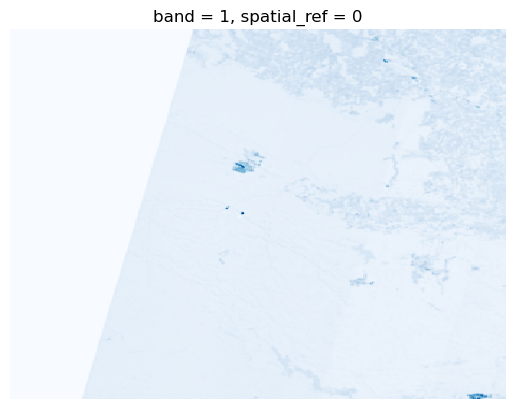

In [91]:
# import xarray as xr
import rioxarray

ds = rioxarray.open_rasterio(
    least_cloudy_item.assets["B02"].href, overview_level=4
).squeeze()
img = ds.plot(cmap="Blues", add_colorbar=False)
img.axes.set_axis_off();